# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Reajuste de base de datos de BTC_ind_mom_ET

El objetivo de este notebook es reajustar el data set "BTC_ind_mom_ET.csv" según las conclusiones alcanzadas al momento de llevarse a cabo su corerspondiente análisis univariado, bivariado y multivariado (ver, "Primera entrega.docx", "Metadata.docx", y/o "Análisis univariado, bivariado y multivariado de BTC_ind_mom_ET.ipynb"). 

En concreto, se procederá a eliminar las variables originales del data set que fueron descartadas según los criterios establecidos en el punto 7 del documento "Primera entrega.docx", y se agregarán las variables [Trend] y [Residuals] (propias de una serie de tiempo).

Así, el data set "BTC_ind_mom_ET_fv.csv" (que se crea al final de este notebook) solo requerirá manipulaciones menores al momento de ser procesado por los diversos modelos de ML en lo que resta del proyecto.

# Librerías

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_ind_mom_ET

In [4]:
# Se carga la base de datos de BTC_ind_mom_ET desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1cUBbMAbGg1iELh1pdg-dOJmrcBwbFmzp/view?usp=sharing"

In [5]:
dwn_url=gdriveColabPath(sharing_url)
BTC_ind_mom_ET_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_ind_mom_ET_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroondown,Aroonup,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,STOCHRSI_fastd,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,STOCHRSI_fastd_ET
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion


# Data wrangling

Según se puede leer en el documento de trabajo "Primera entrega.docx", item 7, luego de ejecutarse el análisis univariado, bivariado y multivariado de "BTC_ind_mom_ET.csv", se redujo la cantidad de variables del data set según diversos criterios de selección allí explicitados.

En primera instancia se eliminarán las variables que no se van a utilizar, y en un segundo término, se agregarán las variables ausentes en BTC_ind_mom_ET.csv que se consideraron relevantes incoprotar para el momento del modelado (i.e. [Trend] y [Residuals]).

In [6]:
BTC_ind_mom_ET_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroondown', 'Aroonup', 'Aroon_Oscillator', 'MACD', 'MACDSIGNAL',
       'MACDHIST', 'MOM', 'ROC', 'RSI', 'STOCHRSI_fastk', 'STOCHRSI_fastd',
       'ULTOSC', 'WILLR', 'ADX_ET', 'ADXR_ET', 'MACD_ET', 'ROC_ET',
       'STOCHRSI_fastk_ET', 'STOCHRSI_fastd_ET'],
      dtype='object')

PASO 1 -> se eliminan las variables que no se van a utilizar

In [7]:
BTC_ind_mom_ET_df_reduced = BTC_ind_mom_ET_df [['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroon_Oscillator', 'MACD', 'MACDSIGNAL',
       'MACDHIST', 'MOM', 'ROC', 'RSI', 'STOCHRSI_fastk',
       'ULTOSC', 'WILLR', 'ADX_ET', 'ADXR_ET', 'MACD_ET', 'ROC_ET',
       'STOCHRSI_fastk_ET']].copy()

In [8]:
# Se revisa las columnas del nuevo dataframe
BTC_ind_mom_ET_df_reduced.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroon_Oscillator', 'MACD', 'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC',
       'RSI', 'STOCHRSI_fastk', 'ULTOSC', 'WILLR', 'ADX_ET', 'ADXR_ET',
       'MACD_ET', 'ROC_ET', 'STOCHRSI_fastk_ET'],
      dtype='object')

In [9]:
# Se revisa la cantidad de datos en cada variable/columna del nuevo dataframe
BTC_ind_mom_ET_df_reduced.count()

Date                 4386
Price                4386
Open                 4386
High                 4386
Low                  4386
Vol.                 4386
Percentage_diff      4386
Target               4386
ADX                  4359
ADX_MDI              4372
ADX_MDM              4372
ADX_DX               4372
ADX_PDI              4372
ADX_PDM              4373
Aroon_Oscillator     4372
MACD                 4353
MACDSIGNAL           4353
MACDHIST             4353
MOM                  4376
ROC                  4376
RSI                  4376
STOCHRSI_fastk       4366
ULTOSC               4358
WILLR                4373
ADX_ET               4386
ADXR_ET              4386
MACD_ET              4386
ROC_ET               4386
STOCHRSI_fastk_ET    4386
dtype: int64

Los registros NaN se deben a las fórmulas de los indicadores en cuestión.

Paso 2 -> se calcula y agregan las columnas ausentes [Trend] y [Residuals]

In [10]:
BTC_ind_mom_ET_df_reduced.dtypes

Date                  object
Price                float64
Open                 float64
High                 float64
Low                  float64
Vol.                 float64
Percentage_diff      float64
Target               float64
ADX                  float64
ADX_MDI              float64
ADX_MDM              float64
ADX_DX               float64
ADX_PDI              float64
ADX_PDM              float64
Aroon_Oscillator     float64
MACD                 float64
MACDSIGNAL           float64
MACDHIST             float64
MOM                  float64
ROC                  float64
RSI                  float64
STOCHRSI_fastk       float64
ULTOSC               float64
WILLR                float64
ADX_ET                object
ADXR_ET               object
MACD_ET               object
ROC_ET                object
STOCHRSI_fastk_ET     object
dtype: object

In [11]:
# Se convierte la varibale [Date] a datetime64 a fin de poder calcular la descomposición de la serie de tiempo (var=[Price])
BTC_ind_mom_ET_df_reduced ["Date"] = pd.to_datetime (BTC_ind_mom_ET_df_reduced ["Date"])

In [12]:
BTC_ind_mom_ET_df_reduced.dtypes

Date                 datetime64[ns]
Price                       float64
Open                        float64
High                        float64
Low                         float64
Vol.                        float64
Percentage_diff             float64
Target                      float64
ADX                         float64
ADX_MDI                     float64
ADX_MDM                     float64
ADX_DX                      float64
ADX_PDI                     float64
ADX_PDM                     float64
Aroon_Oscillator            float64
MACD                        float64
MACDSIGNAL                  float64
MACDHIST                    float64
MOM                         float64
ROC                         float64
RSI                         float64
STOCHRSI_fastk              float64
ULTOSC                      float64
WILLR                       float64
ADX_ET                       object
ADXR_ET                      object
MACD_ET                      object
ROC_ET                      

In [13]:
# Se crea y reindexa BTC_ind_mom_ET_df_reduced_2 con la variable [Date] como nuevo índice
BTC_ind_mom_ET_df_reduced_2 = BTC_ind_mom_ET_df_reduced.set_index("Date")

In [14]:
# Se procede a calcular las variables [Trend] y [Residuals] y a agregarlas a BTC_ind_mom_ET_df_reduced
descomposicion = sm.tsa.seasonal_decompose(BTC_ind_mom_ET_df_reduced_2 ['Price'], model='additive')

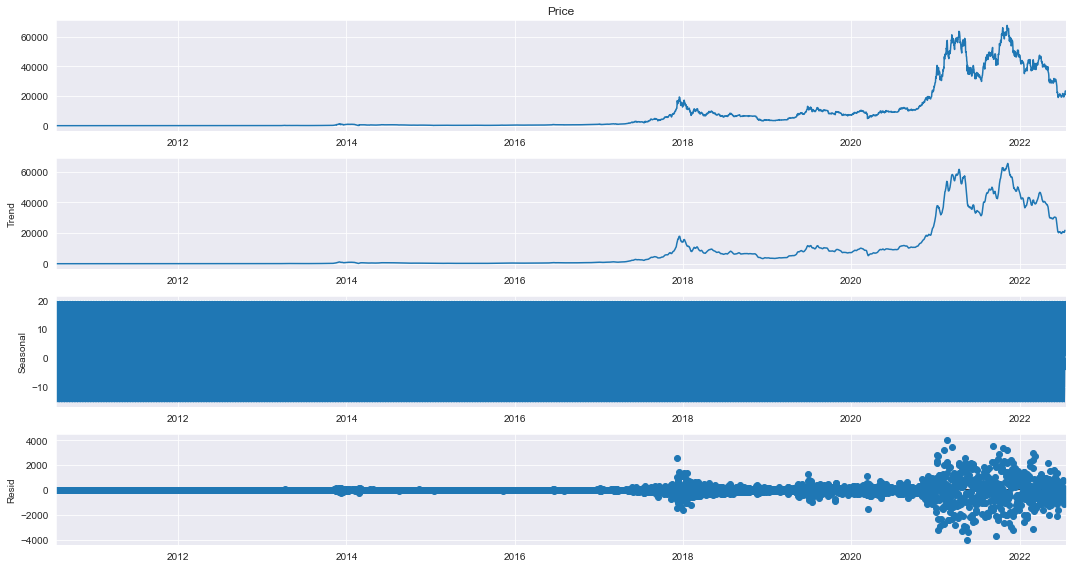

In [15]:
# Se grafica la descomposición de la serie de tiempo
fig = descomposicion.plot()
fig.set_size_inches((15, 8))
fig.tight_layout()
plt.show()

In [16]:
# Se obtienen los valores de las residualidad y tendencia
resid = descomposicion.resid
trend = descomposicion.trend

In [17]:
# Se crea un data set que se utilizará para concatenarlo a la copia de BTC_ind_mom_ET_df_reduced que se creará debajo (BTC_ind_mom_ET_df_reduced_3)
descomposicion_df = pd.DataFrame ()

In [18]:
# Se copias los valore a las columnas del nuevo data set
descomposicion_df ["Trend"] = trend.values
descomposicion_df ["Residuals"] = resid.values

In [19]:
# Se analizan los valores del data set que se concatenará debajo con la copia de BTC_ind_mom_ET_df_reduced que se creará oportunamente (BTC_ind_mom_ET_df_reduced_3)
descomposicion_df.count()

Trend        4380
Residuals    4380
dtype: int64

In [20]:
descomposicion_df.isnull().sum()

Trend        6
Residuals    6
dtype: int64

In [21]:
# Tres registros NaN
descomposicion_df.head()

,Trend,Residuals
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,0.1,-19.575231
4,0.1,15.128694


In [23]:
# Aquí se ven los tres registro NaN que faltaban para completar los 4386 de BTC_ind_mom_df_reduced (y tablas copias/modificadas)
descomposicion_df.tail()

,Trend,Residuals
4381,21370.371429,-160.287691
4382,21784.528571,-994.949467
4383,NaN,NaN
4384,NaN,NaN
4385,NaN,NaN


In [24]:
# Se crea la tabla que se concatenerá y que fue referida en los comentarios arriba como BTC_ind_mom_ET_fv.csv
BTC_ind_mom_ET_df_reduced_3 = BTC_ind_mom_ET_df_reduced.copy()

In [25]:
# Se revisan sus columnas para chequear que [Date] no es el índice como en BTC_ind_mom_ET_df_reduced_2
BTC_ind_mom_ET_df_reduced_3.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroon_Oscillator', 'MACD', 'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC',
       'RSI', 'STOCHRSI_fastk', 'ULTOSC', 'WILLR', 'ADX_ET', 'ADXR_ET',
       'MACD_ET', 'ROC_ET', 'STOCHRSI_fastk_ET'],
      dtype='object')

In [26]:
# Concatenando descomposicion_df con BTC_metals_df_reduced_3 en una nueva base de datos => BTC_ind_mom_ET_df_reduced_4
BTC_ind_mom_ET_df_reduced_4 = pd.concat([BTC_ind_mom_ET_df_reduced_3, descomposicion_df], axis=1, join="inner")

In [28]:
BTC_ind_mom_ET_df_reduced_4.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694


In [29]:
BTC_ind_mom_ET_df_reduced_4.tail()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
4381,2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,27.268083,24.194644,24.194644,6.885001,21.077646,3443.366972,35.714286,-636.592931,-960.502376,323.909445,648.8,0.031555,54.341002,100.000000,55.402532,-34.498468,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,21370.371429,-160.287691
4382,2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,25.710035,22.840734,22.840734,5.455418,20.477541,3290.512188,35.714286,-577.232483,-883.848398,306.615914,-852.2,-0.039385,49.615550,59.412565,52.658819,-47.925083,Mantener_posicion,Mantener_posicion,Mantener_posicion,Vender,Vender,21784.528571,-994.949467
4383,2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,24.545625,20.207578,20.207578,9.408284,24.404841,4115.975603,35.714286,-385.327489,-784.144216,398.816727,914.6,0.042321,63.915158,100.000000,61.793596,-5.012325,Comprar,Mantener_posicion,Mantener_posicion,Comprar,Comprar,NaN,NaN
4384,2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,24.304487,17.742843,17.742843,21.169702,27.272446,4864.377346,42.857143,-160.032949,-659.321963,499.289013,1822.7,0.084433,68.899442,100.000000,68.346203,-7.208573,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
4385,2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0.0,24.080574,17.259314,17.259314,21.169702,26.529215,4516.921821,42.857143,-2.524886,-527.962547,525.437661,2301.7,0.110407,65.912930,87.564957,64.588452,-12.631098,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN


Paso 3 -> se crea la base de datos "BTC_ind_mom_ET_fv.csv" que se modelará según diversos modelos de ML en lo que resta del proyecto.

In [31]:
BTC_ind_mom_ET_df_reduced_4.to_csv ("D:\Luciano\Programación\Data science\Trabajo final\Bases de datos para modelos\BTC_ind_mom_ET_fv.csv", index=False, sep=";")